In [1]:
%cd ../

/home/zulqarnain/Code/ntfa_rest_template/ntfa_degeneracy


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.tardb as tardb
import htfa_torch.utils as utils
import nilearn.plotting as niplot
import matplotlib.pyplot as plt

In [ ]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
from nilearn.connectome import ConnectivityMeasure

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
spreng_db = tardb.FmriTarDataset('data/mini_aging_site1_blocks.tar')

In [6]:
dtfa = DTFA.DeepTFA(spreng_db, num_factors=100, embedding_dim=2)

In [7]:
dtfa.num_blocks

98

In [8]:
dtfa.num_voxels

142880

In [9]:
dtfa.load_state('data/spreng_n7_blocks_09162023_182303_Epoch2000')

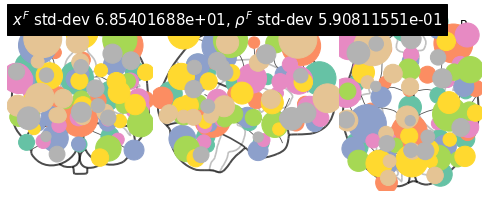

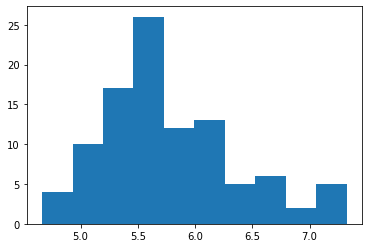

(<nilearn.plotting.displays.OrthoProjector at 0x7fee48a33dc0>,
 tensor([[ 1.5926e-01, -2.3675e+01,  2.4611e+01],
         [ 3.1879e+01, -9.4336e+01,  1.3113e+01],
         [ 2.9405e+01, -1.1173e+01, -1.7325e+01],
         [-5.8438e+01, -5.9437e+01, -5.6092e+00],
         [-3.5871e+00,  6.2458e+01,  2.9207e+01],
         [ 5.7898e+01, -5.7162e+01,  3.5594e+01],
         [ 5.8679e+01, -7.2919e+00,  3.3888e+01],
         [-5.6137e+01, -6.5357e+01,  4.2594e+01],
         [ 2.9155e+01,  6.6545e+01,  5.5959e+00],
         [-5.6406e+01,  1.1781e+00, -3.8691e+01],
         [-6.7862e-01, -5.5747e+01, -4.0931e+01],
         [-4.5892e+01,  7.9464e+00,  2.8313e+01],
         [ 3.1403e+01, -5.7077e+01, -3.2248e+01],
         [-4.1047e+01, -2.6630e+01,  1.3426e+01],
         [-2.6206e+01,  2.3038e+00,  5.5821e+01],
         [ 2.5377e+00, -5.0773e+01,  4.8116e+01],
         [ 4.5648e+01,  4.3291e+01,  6.3243e+01],
         [-6.9225e-01, -4.9929e+01, -1.3785e+01],
         [ 6.9000e+01, -3.8320e+00,  

In [10]:
dtfa.visualize_factor_embedding()

/home/zulqarnain/Code/ntfa_rest_template/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


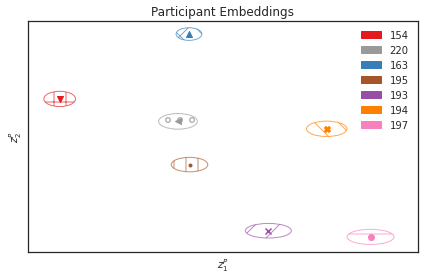

In [11]:
dtfa.scatter_subject_weight_embedding(figsize=None, colormap='Set1',
                            filename='spreng_subject_embedding_blocks.pdf')

In [12]:
dtfa._dataset.blocks[0]['subject']

193

In [13]:
def subject_labeler(subject):
    return 'Subject %d' % subject

def subject_blocks(subject_label, subject_labeler=subject_labeler):
    for b in dtfa._dataset.blocks.items():
        if subject_labeler(b[1]['subject']) == subject_label:
            yield b
            
def subject_weights(subject_label, subject_labeler=subject_labeler):
    for (b, W) in enumerate(dtfa.variational.hyperparams.state_vardict()['weights__mu']):
        if subject_labeler(dtfa._dataset.blocks[b]['subject']) == subject_label:
            yield W

def subject_age_group(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b[1]['individual_differences']['agegroup']:
            yield b[1]['individual_differences']['agegroup']
            
def subject_agegroup_labeler(subject):
    subject_group = [group for group in subject_age_group(subject, lambda s: s)]
    result = np.unique(subject_group)[0]
    return result

In [14]:
def subject_sex_group(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b[1]['individual_differences']['sex']:
            yield b[1]['individual_differences']['sex']
            
def subject_sex_labeler(subject):
    subject_group = [group for group in subject_sex_group(subject, lambda s: s)]
    result = np.unique(subject_group)[0]
    return result

In [15]:
def subject_age(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b[1]['individual_differences']['age']:
            yield b[1]['individual_differences']['age']
            
def subject_age_labeler(subject):
    subject_group = [group for group in subject_age(subject, lambda s: s)]
    result = np.unique(subject_group)[0]
    return result

In [16]:
def subject_education(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b[1]['individual_differences']['education']:
            yield b[1]['individual_differences']['education']
            
def subject_education_labeler(subject):
    subject_group = [group for group in subject_education(subject, lambda s: s)]
    result = np.unique(subject_group)[0]
    return result

/home/zulqarnain/Code/ntfa_rest_template/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


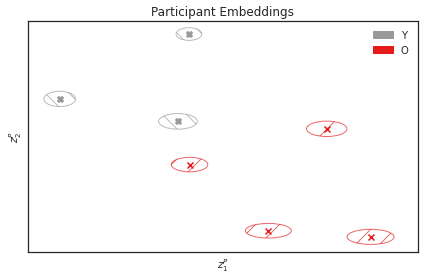

In [17]:
dtfa.scatter_subject_weight_embedding(labeler=subject_agegroup_labeler, figsize=None, colormap='Set1',
                            filename='spreng_subject_embedding_blocks_label.pdf')

/home/zulqarnain/Code/ntfa_rest_template/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


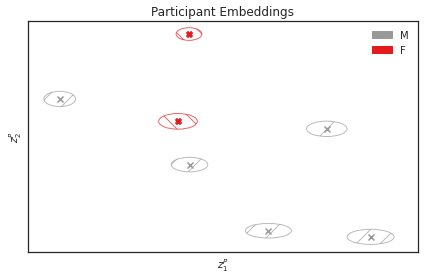

In [18]:
dtfa.scatter_subject_weight_embedding(labeler=subject_sex_labeler, figsize=None, colormap='Set1',
                            filename='spreng_subject_embedding_blocks_label_sex.pdf')

/home/zulqarnain/Code/ntfa_rest_template/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


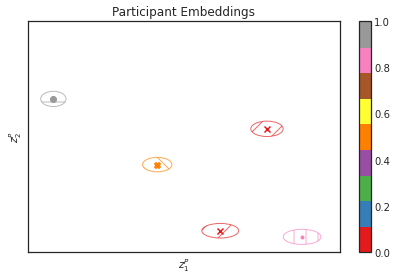

In [19]:
dtfa.scatter_subject_weight_embedding(labeler=subject_education_labeler, figsize=None, colormap='Set1',
                            filename='spreng_subject_embedding_blocks_label_education.pdf')

/home/zulqarnain/Code/ntfa_rest_template/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


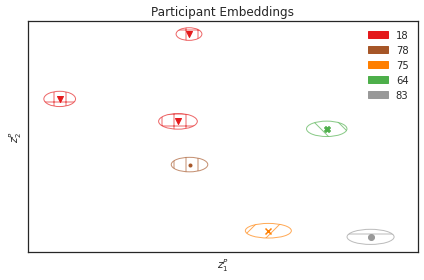

In [20]:
dtfa.scatter_subject_weight_embedding(labeler=subject_age_labeler, figsize=None, colormap='Set1',
                            filename='spreng_subject_embedding_blocks_label_age.pdf')

09/19/2023 12:15:32 Plotting factors for Participant 197, run 2


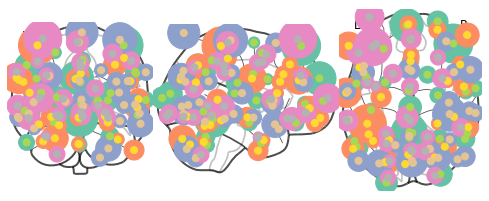

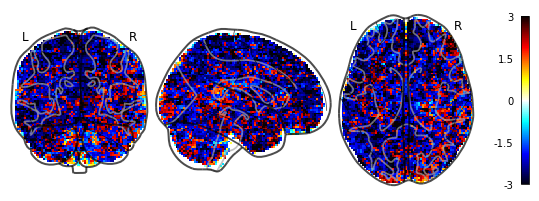

09/19/2023 12:16:18 Reconstruction Error (Frobenius Norm): 3.77342651e+02 out of 4.05010681e+02


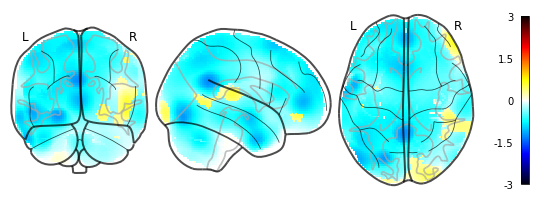

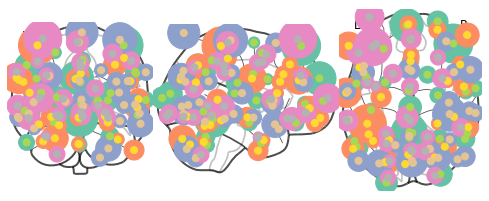

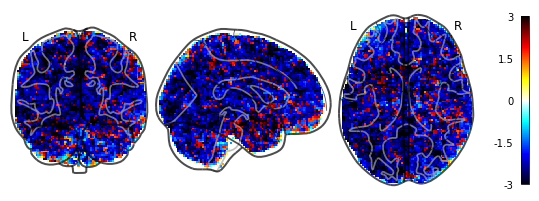

09/19/2023 12:17:06 Reconstruction Error (Frobenius Norm): 3.67923218e+02 out of 4.28979950e+02


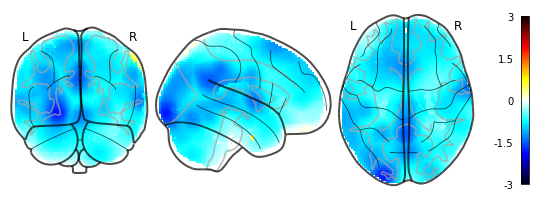

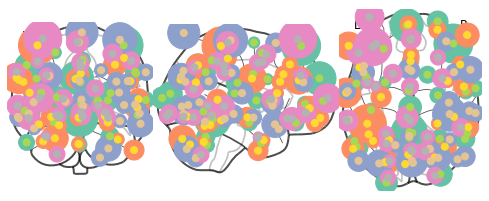

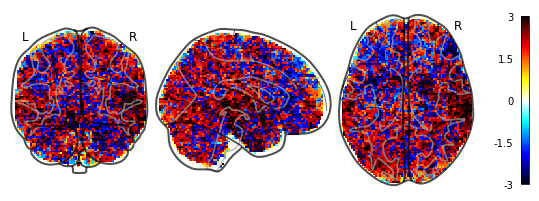

09/19/2023 12:17:59 Reconstruction Error (Frobenius Norm): 3.53776611e+02 out of 3.74864716e+02


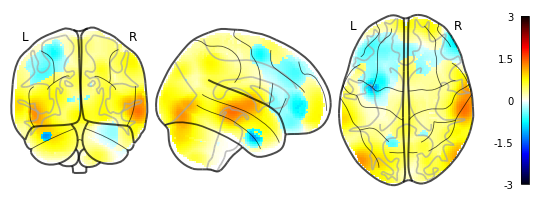

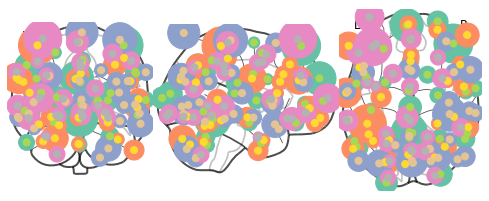

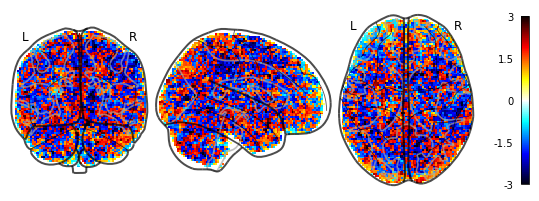

09/19/2023 12:18:48 Reconstruction Error (Frobenius Norm): 2.92388733e+02 out of 2.99457458e+02


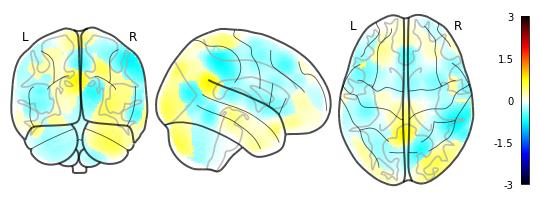

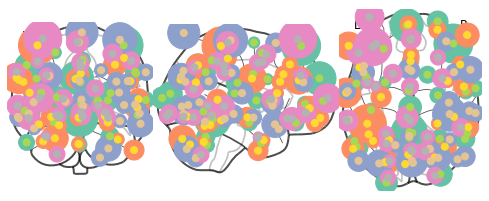

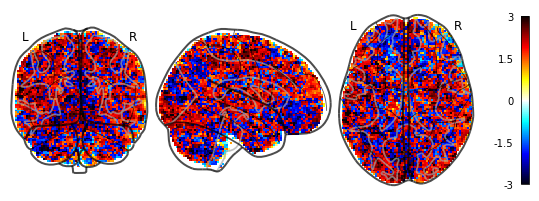

09/19/2023 12:19:41 Reconstruction Error (Frobenius Norm): 3.41347626e+02 out of 3.57651367e+02


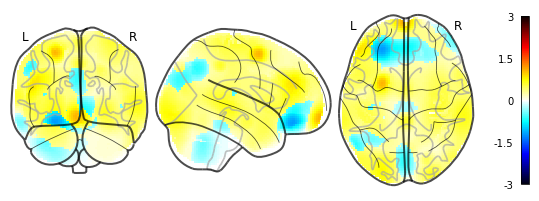

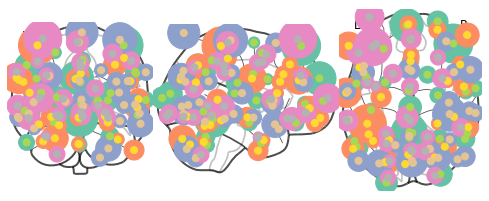

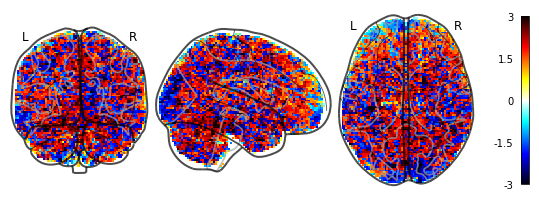

09/19/2023 12:20:34 Reconstruction Error (Frobenius Norm): 3.19999481e+02 out of 3.33488495e+02


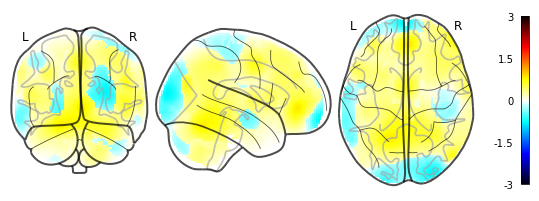

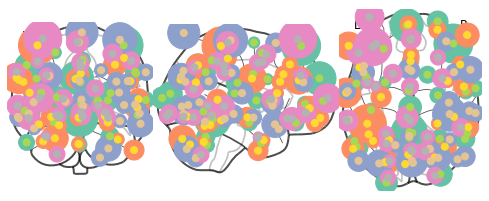

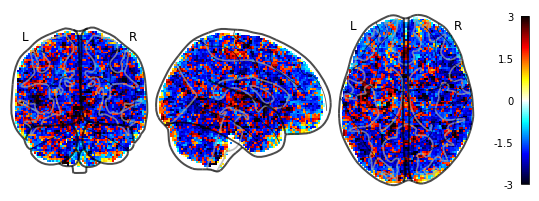

09/19/2023 12:21:21 Reconstruction Error (Frobenius Norm): 3.12551086e+02 out of 3.32217499e+02


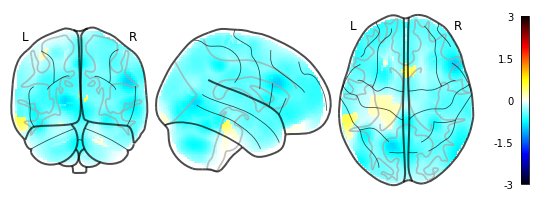

In [21]:
subject_runs = spreng_db.subject_runs()

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in spreng_db.blocks.values() if block['subject'] == subject and block['run'] == run]
    blocks.sort(key=lambda b: b['times'][0])
    for block in blocks:
        index = block['id']
        dtfa.plot_factor_centers(index,)
        dtfa.plot_original_brain(index,)
        dtfa.plot_reconstruction(index,)

In [223]:
all_subject_weight_blocks = {key:None for key in dtfa._subjects}
all_subject_correlations = {key: None for key in dtfa._subjects}
all_subject_fisherz_correlations = {key: None for key in dtfa._subjects}
all_subject_mean_correlations = {key: None for key in dtfa._subjects}
all_sujbect_std_correlations = {key: None for key in dtfa._subjects}

for s in dtfa._subjects:
    print ("Processing Subject " + str(s))
    all_subject_weight_blocks[s] = [weights.data.numpy() for weights in subject_weights(s, lambda x: x)]
    estimator = ConnectivityMeasure(kind='correlation').fit(all_subject_weight_blocks[s])
#     all_subject_correlations[s] = np.array([utils.get_correlation_matrix(weights.T, 
#                                                          weights.T) 
#                                             for weights in all_subject_weight_blocks[s]])
    all_subject_correlations[s] = estimator.transform(all_subject_weight_blocks[s])
    all_subject_fisherz_correlations[s] = np.arctanh(all_subject_correlations[s])
    all_subject_mean_correlations[s] = estimator.mean_
    np.fill_diagonal(all_subject_mean_correlations[s], 0)

Processing Subject 193
Processing Subject 194
Processing Subject 195
Processing Subject 197
Processing Subject 154
Processing Subject 163
Processing Subject 220


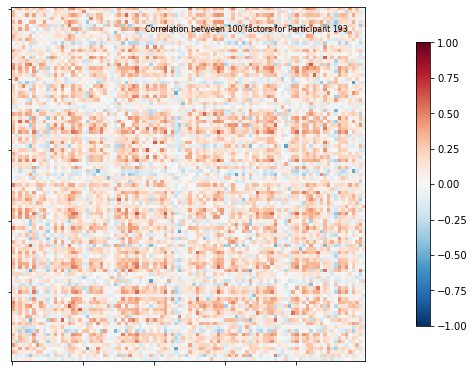

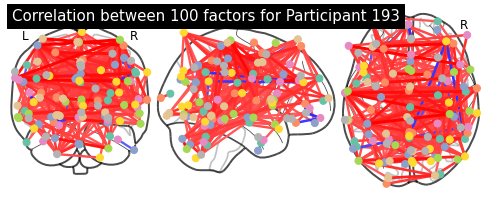

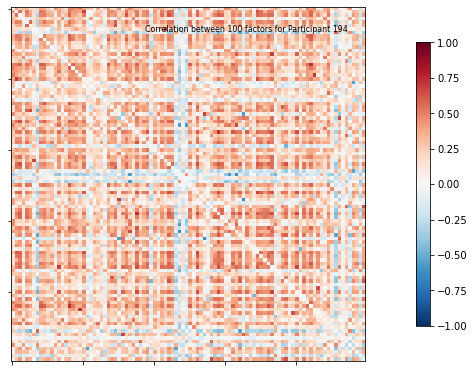

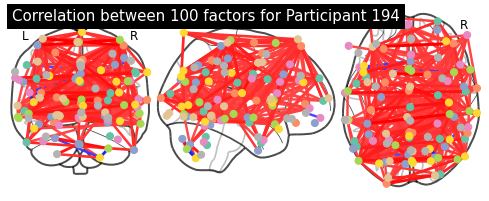

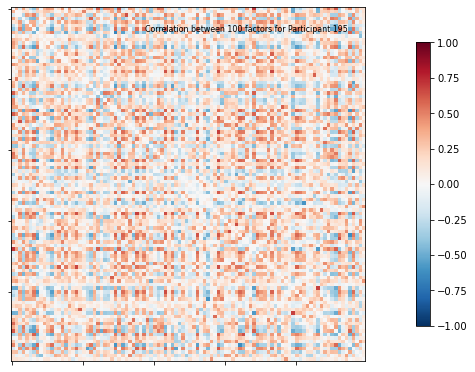

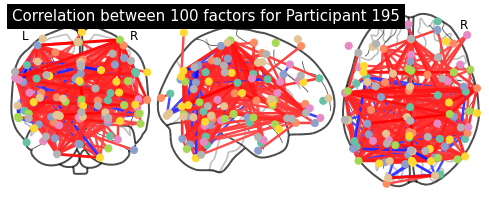

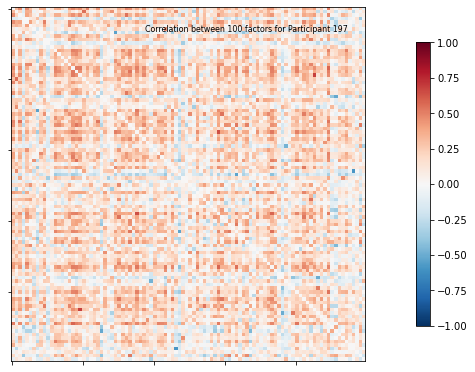

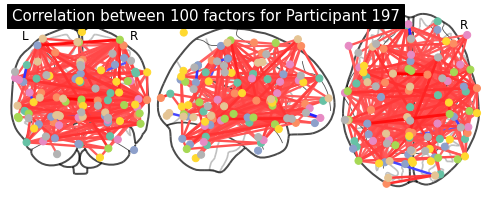

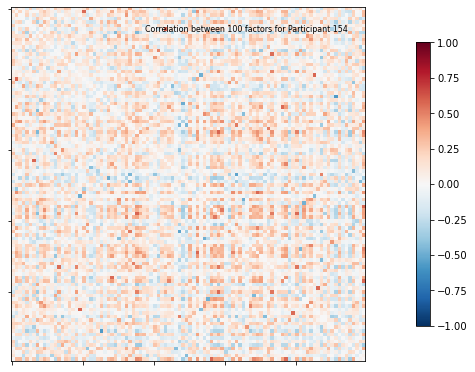

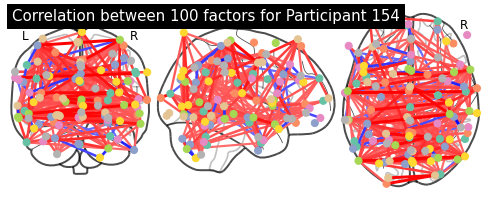

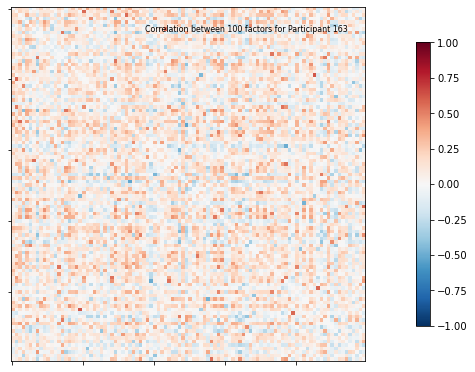

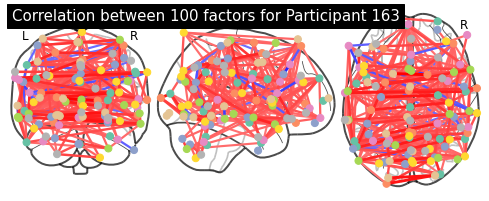

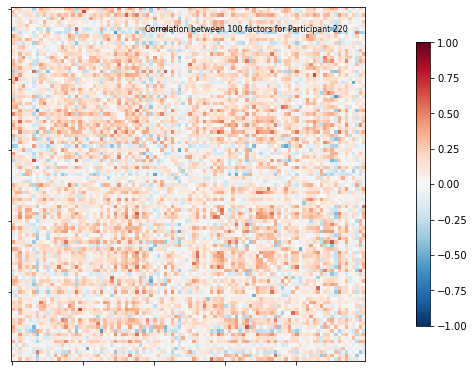

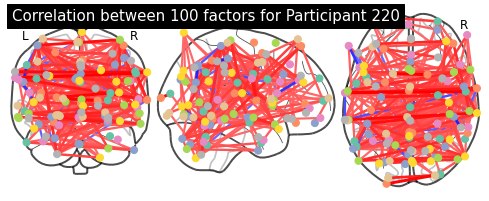

In [228]:
all_factor_centers = dtfa.variational.hyperparams.state_vardict()['template_factor_centers__mu'].data.numpy()
all_factor_widths = np.exp(dtfa.variational.hyperparams.state_vardict()['template_factor_log_widths__mu'].data.numpy())
for s in dtfa._subjects:
    title = f"Correlation between {int(dtfa.num_factors)} factors for Participant {s}"

    # First plot the matrix
    display = niplot.plot_matrix(
        all_subject_mean_correlations[s], colorbar=True, title=title, vmin=-1, vmax=1,
    )


    niplot.plot_connectome(
        all_subject_mean_correlations[s], 
        all_factor_centers, 
        edge_threshold="95%", 
        title=title, 
#         node_size=all_factor_widths,
    )

/home/zulqarnain/anaconda3/envs/pytorch/lib/python3.8/site-packages/nilearn/plotting/matrix_plotting.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 1, figsize=(7, 5))


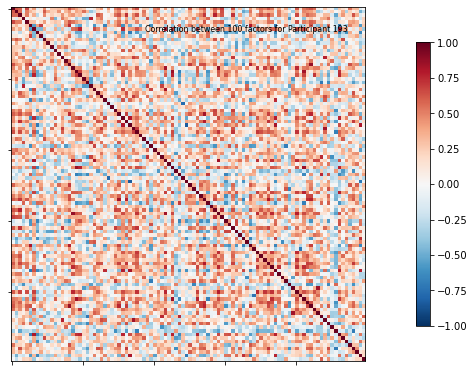

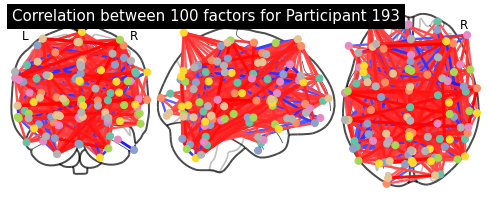

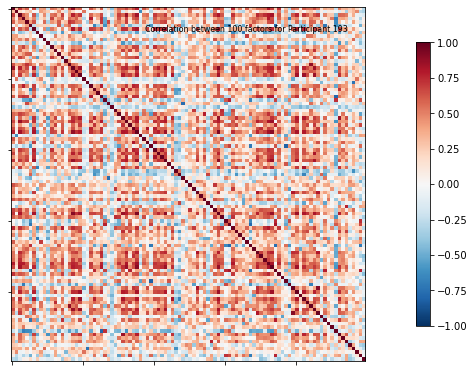

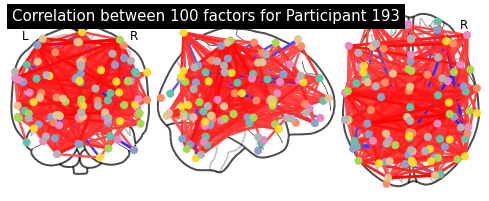

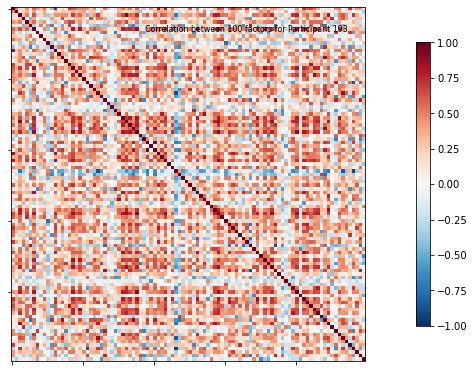

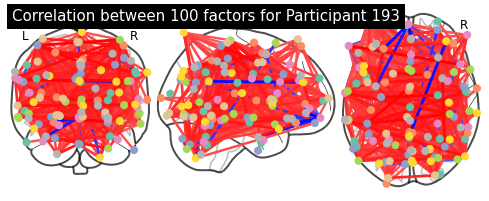

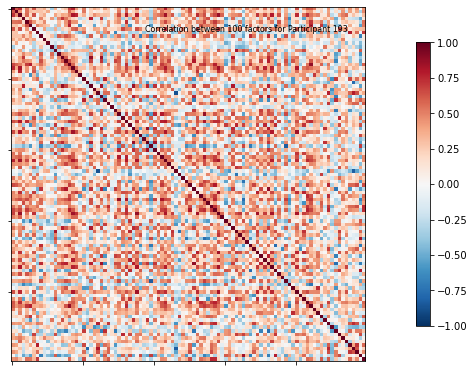

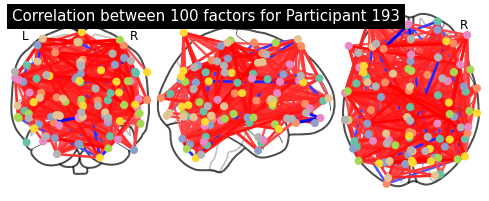

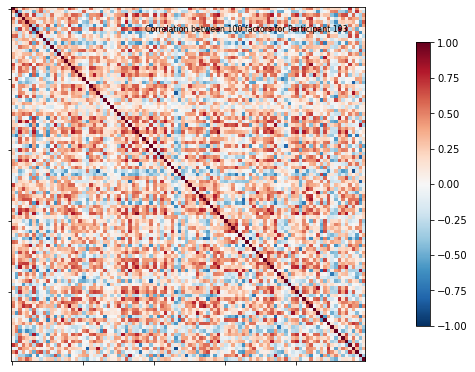

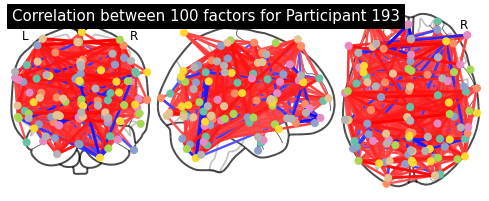

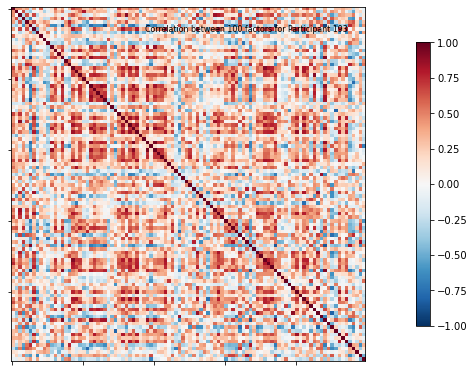

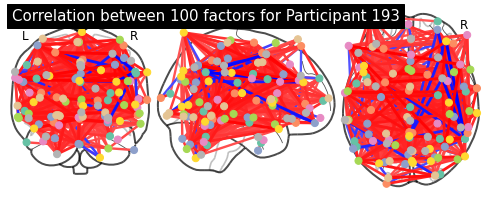

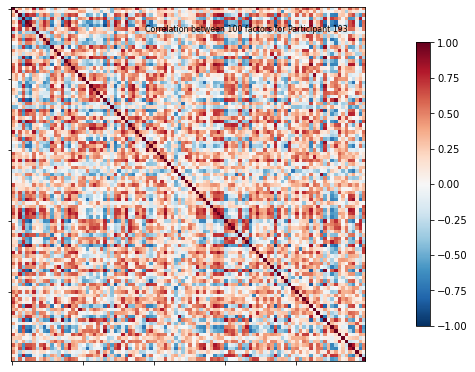

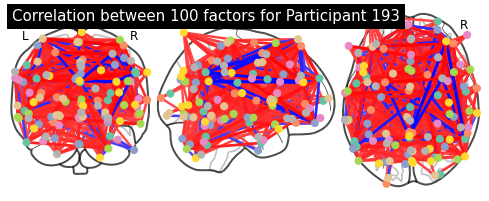

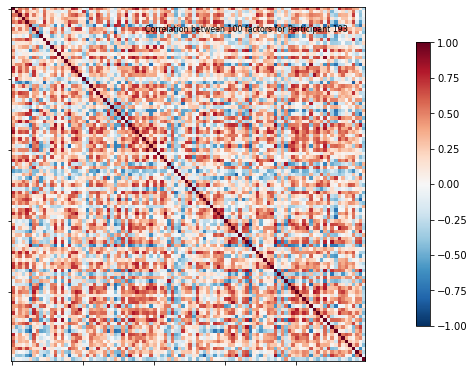

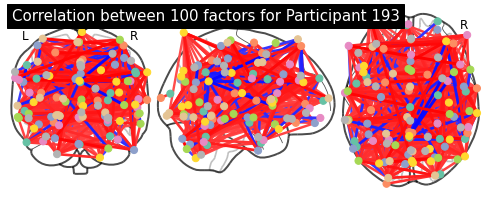

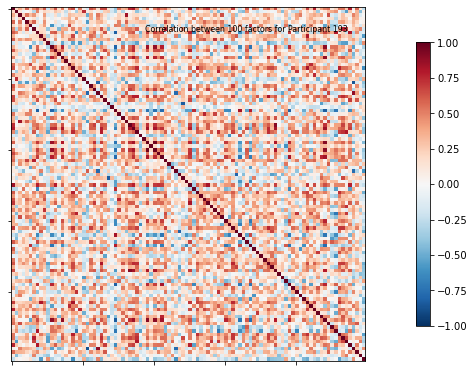

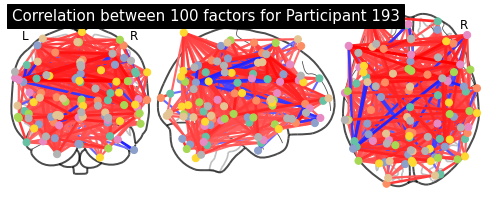

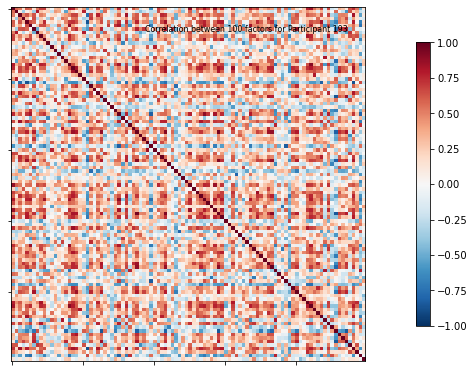

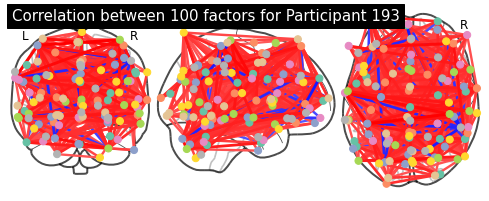

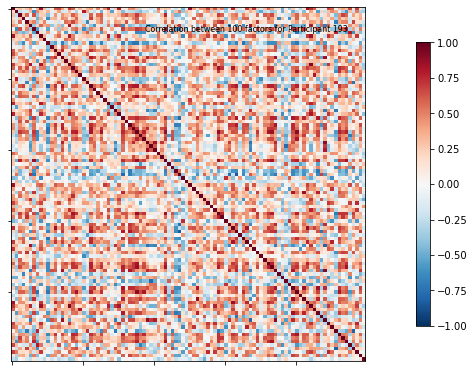

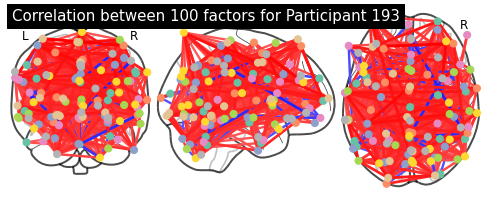

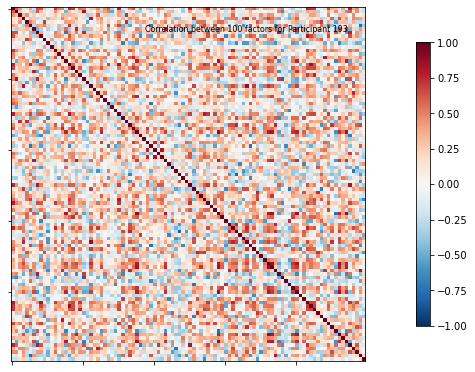

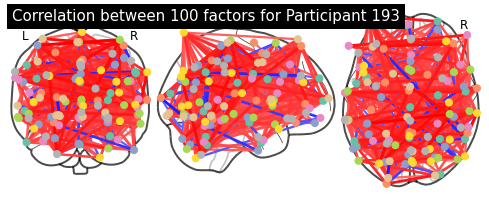

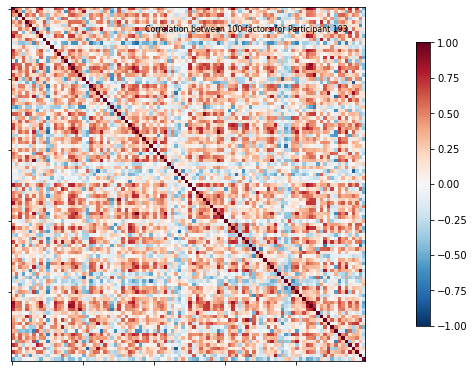

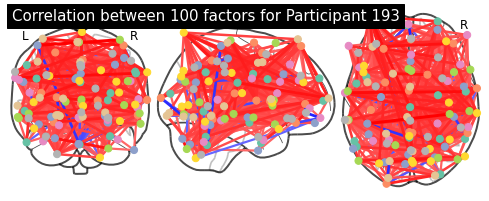

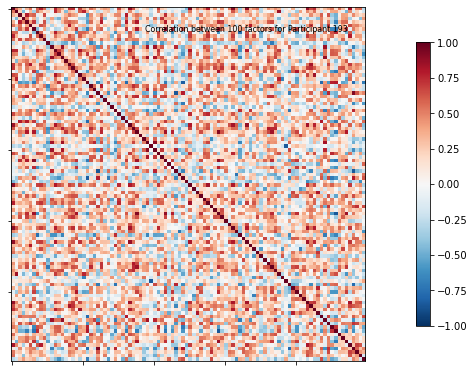

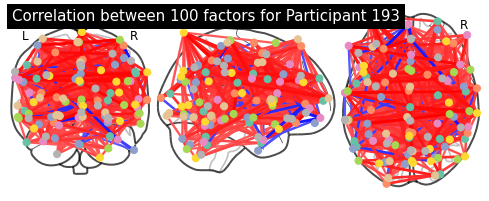

In [24]:
s = 193
for subject_corrs in all_subject_correlations[s]:
    title = f"Correlation between {int(dtfa.num_factors)} factors for Participant {s}"

    # First plot the matrix
    display = niplot.plot_matrix(
        subject_corrs, vmax=1, vmin=-1, colorbar=True, title=title
    )


    niplot.plot_connectome(
        subject_corrs, all_factor_centers, edge_threshold="90%", title=title
    )

Subject: 193


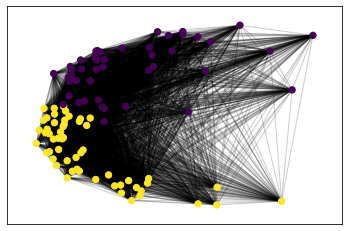

<Figure size 432x288 with 0 Axes>

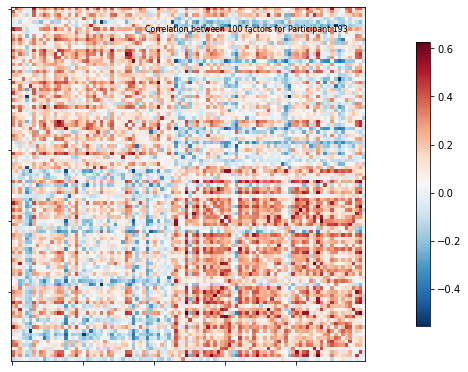

Subject: 194


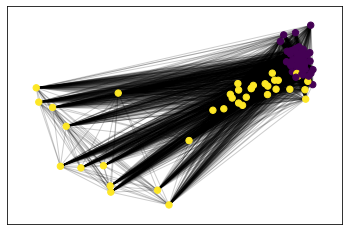

<Figure size 432x288 with 0 Axes>

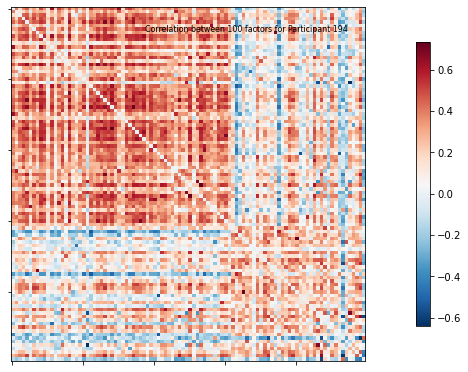

Subject: 195


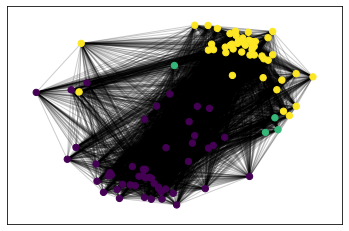

<Figure size 432x288 with 0 Axes>

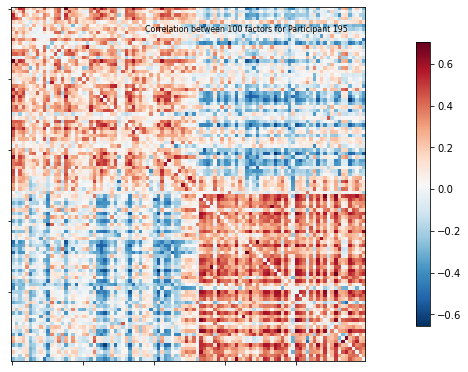

Subject: 197


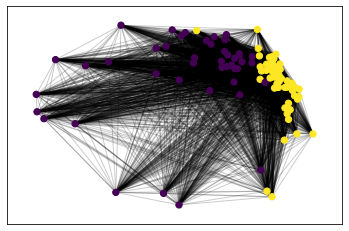

<Figure size 432x288 with 0 Axes>

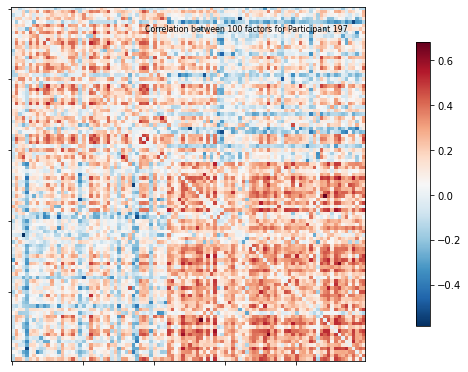

Subject: 154


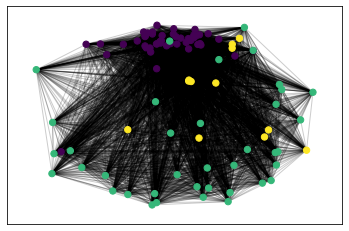

<Figure size 432x288 with 0 Axes>

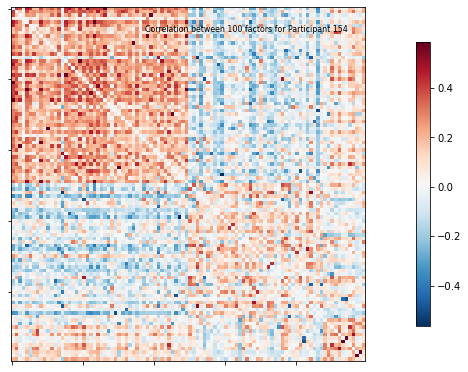

Subject: 163


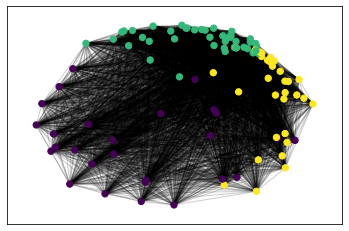

<Figure size 432x288 with 0 Axes>

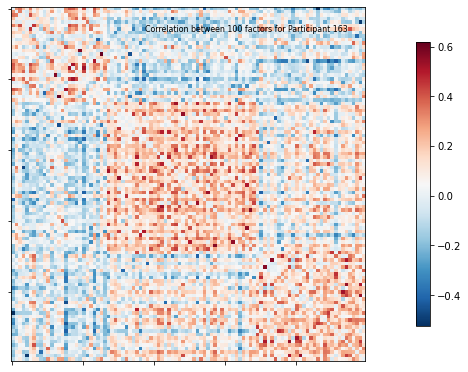

Subject: 220


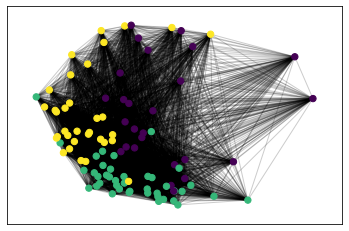

<Figure size 432x288 with 0 Axes>

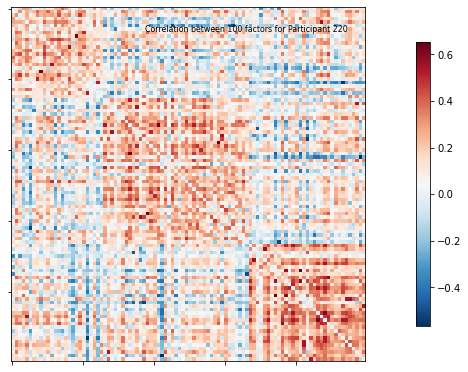

In [229]:
for s in dtfa._subjects:
    print ("Subject: " + str(s))
    corr = all_subject_mean_correlations[s]
    corr[corr == np.inf] = 0
    modularity = []
    for seed in range(100):
        modularity.append(bct.modularity.community_louvain(corr, B='negative_sym', seed=seed)[1])
    louvain_partition = bct.modularity.community_louvain(corr, B='negative_sym', seed=np.argmax(modularity))[0]
    G = nx.from_numpy_array(corr)
    bct_partition = {key:label for (key, label) in enumerate(louvain_partition)}
    #first compute the best partition
    # partition = community_louvain.best_partition(G)

    # draw the graph
    plt.figure()
    pos = nx.spring_layout(G, seed=1)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(bct_partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, bct_partition.keys(), node_size=40,
                           cmap=cmap, node_color=list(bct_partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.2)
    plt.show()
    plt.close()
    plt.figure()
    display = niplot.plot_matrix(corr[np.argsort(louvain_partition)][:, np.argsort(louvain_partition)], 
                                 colorbar=True, 
                                 title = f"Correlation between {int(dtfa.num_factors)} factors for Participant {s}")
    plt.show()
    plt.close()

In [230]:
mean_young = (all_subject_mean_correlations[154] +
              all_subject_mean_correlations[220] + all_subject_mean_correlations[163]) / 3

mean_old = (all_subject_mean_correlations[193] +
            all_subject_mean_correlations[194] + 
            all_subject_mean_correlations[195] + 
            all_subject_mean_correlations[195]) / 4

Mean Young


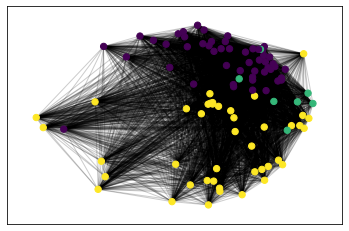

<Figure size 432x288 with 0 Axes>

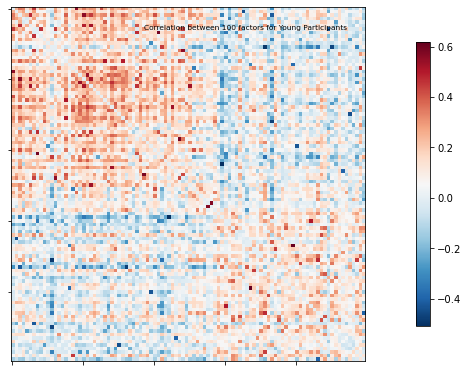

<Figure size 432x288 with 0 Axes>

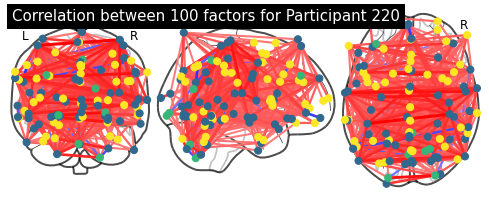

In [232]:
print ("Mean Young")
corr = mean_young
corr[corr == np.inf] = 0
modularity = []
for seed in range(100):
    modularity.append(bct.modularity.community_louvain(corr, B='negative_sym', seed=seed)[1])
louvain_partition = bct.modularity.community_louvain(corr, B='negative_sym', seed=np.argmax(modularity))[0]
G = nx.from_numpy_array(corr)
bct_partition = {key:label for (key, label) in enumerate(louvain_partition)}
#first compute the best partition
# partition = community_louvain.best_partition(G)

# draw the graph
plt.figure()
pos = nx.spring_layout(G, seed=1)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(bct_partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, bct_partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(bct_partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.show()
plt.close()
plt.figure()
display = niplot.plot_matrix(corr[np.argsort(louvain_partition)][:, np.argsort(louvain_partition)], 
                             colorbar=True, 
                             title = f"Correlation between {int(dtfa.num_factors)} factors for Young Participants")
plt.show()
plt.close()
plt.figure()
niplot.plot_connectome(
    mean_old, 
    all_factor_centers, 
    edge_threshold="90%", 
    title=title,
    node_color= cmap(louvain_partition) ,
#   node_size=all_factor_widths,
)
plt.show()
plt.close()

Mean Old


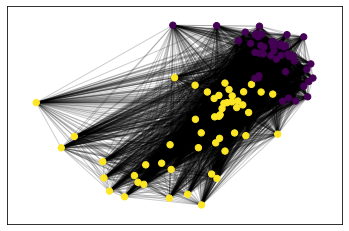

<Figure size 432x288 with 0 Axes>

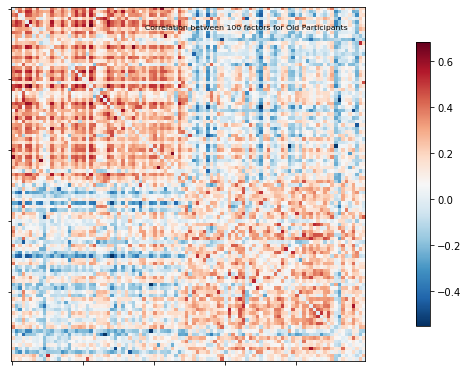

<Figure size 432x288 with 0 Axes>

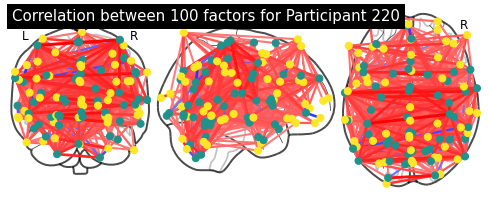

In [233]:
print ("Mean Old")
corr = mean_old
corr[corr == np.inf] = 0
modularity = []
for seed in range(100):
    modularity.append(bct.modularity.community_louvain(corr, B='negative_sym', seed=seed)[1])
louvain_partition = bct.modularity.community_louvain(corr, B='negative_sym', seed=np.argmax(modularity))[0]
G = nx.from_numpy_array(corr)
bct_partition = {key:label for (key, label) in enumerate(louvain_partition)}
#first compute the best partition
# partition = community_louvain.best_partition(G)

# draw the graph
plt.figure()
pos = nx.spring_layout(G, seed=1)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(bct_partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, bct_partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(louvain_partition))
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.show()
plt.close()
plt.figure()
display = niplot.plot_matrix(corr[np.argsort(louvain_partition)][:, np.argsort(louvain_partition)], 
                             colorbar=True, 
                             title = f"Correlation between {int(dtfa.num_factors)} factors for Old Participants")
plt.show()
plt.close()
plt.figure()
niplot.plot_connectome(
    mean_old, 
    all_factor_centers, 
    edge_threshold="90%", 
    title=title,
     node_color= cmap(louvain_partition) ,
#   node_size=all_factor_widths,
)
plt.show()
plt.close()